# HW (mandatory)
1.HW-1: separate the orange from given image (single color)

2.HW-2: why the the black and white mask shows color when plotted?

3.HW-3: build mask(circle) and apply on the given image so that only the orange will be shown. 

# Bonus (recommended)
    
1.Bonus-1: separate the orange with leaf from given image (multi-color)

2.Bonus-2: build mask and apply on the image (use thresholding)

# HW-1: separate the orange from given image (single color)

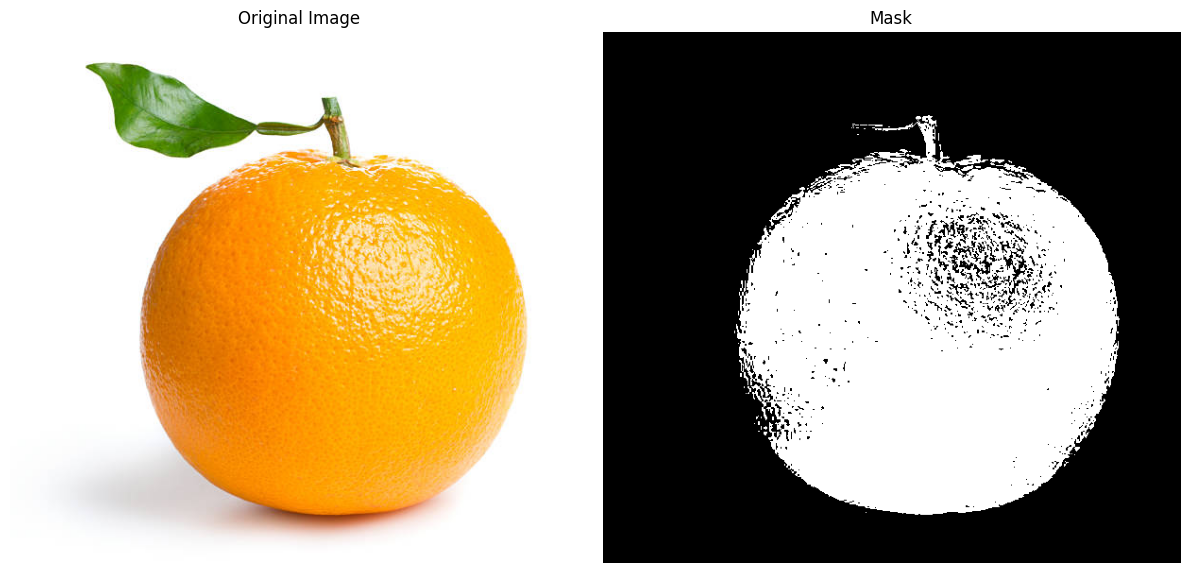

In [1]:
# detecting single color
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image_path = 'orange-1.jpg'  # Replace with your image path
image = cv.imread(input_image_path)

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define range of blue color in HSV
lower_yellow = np.array([15, 100, 100])  # Lower bound for yellow = Hue(20), Saturation(100), Value(100)
upper_yellow = np.array([30, 255, 255])  # Upper bound for yellow

# Threshold the HSV image to get only blue colors. Earlier I was using trishold, now I will use the inRange() 
# Create a mask for yellow color
mask = cv.inRange(hsv, lower_yellow, upper_yellow)  # cv.inRange(input_img, lowerb, upperb)


image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

# HW-2: why the the black and white mask shows color when plotted?

In [ ]:
import cv2 as cv 

# HW-3: build mask(circle) and apply on the given image so that only the orange will be shown.

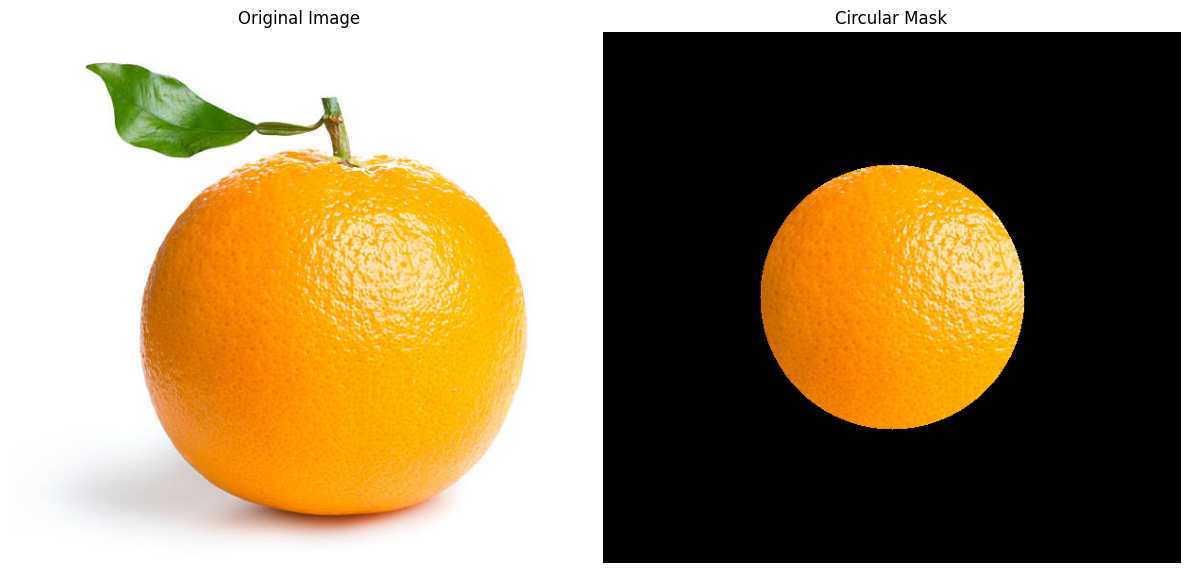

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
input_image_path = 'orange-1.jpg'  
image = cv2.imread(input_image_path)

# Get the dimensions of the image (height, width)
height, width, _ = image.shape

# Create a binary mask of the same size as the image, initialized to zeros (black)
mask = np.zeros((height, width), dtype=np.uint8)

# Define the circle center and radius
center = (width // 2, height // 2)
radius = min(width, height) // 4 

# Draw a filled white circle on the mask
cv2.circle(mask, center, radius, (255), thickness=-1)

# Convert the mask to a 3-channel mask
mask_rgb = cv2.merge([mask, mask, mask])

# Multiply the original image with the mask
result = cv2.bitwise_and(image, mask_rgb)

# Convert the original image and result from BGR to RGB (for proper display with matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title('Circular Mask')
plt.axis('off')

plt.tight_layout()
plt.show()


# Bonus-1: separate the orange with leaf from given image (multi-color)

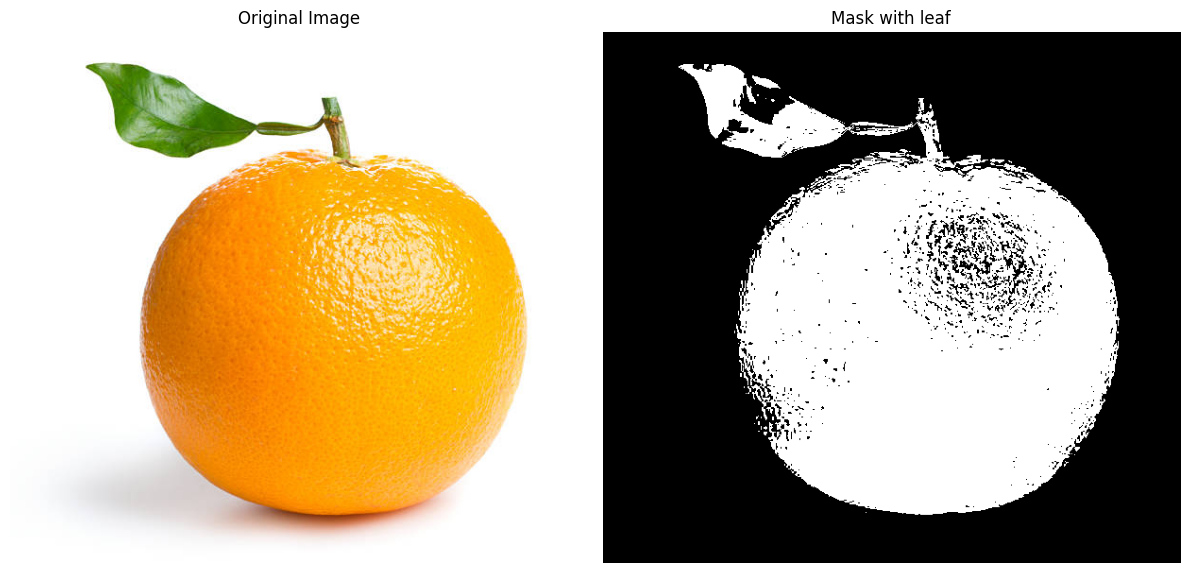

In [10]:
# detecting single color
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image_path = 'orange-1.jpg'  # Replace with your image path
image = cv.imread(input_image_path)

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define range of blue color in HSV
lower_yellow = np.array([15, 100, 100])  # Lower bound for yellow = Hue(20), Saturation(100), Value(100)
upper_yellow = np.array([61, 255, 255])  # Upper bound for yellow

# Threshold the HSV image to get only blue colors. Earlier I was using trishold, now I will use the inRange() 
# Create a mask for yellow color
mask = cv.inRange(hsv, lower_yellow, upper_yellow)  # cv.inRange(input_img, lowerb, upperb)


image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask with leaf')
plt.axis('off')

plt.tight_layout()
plt.show()

# alternative way 

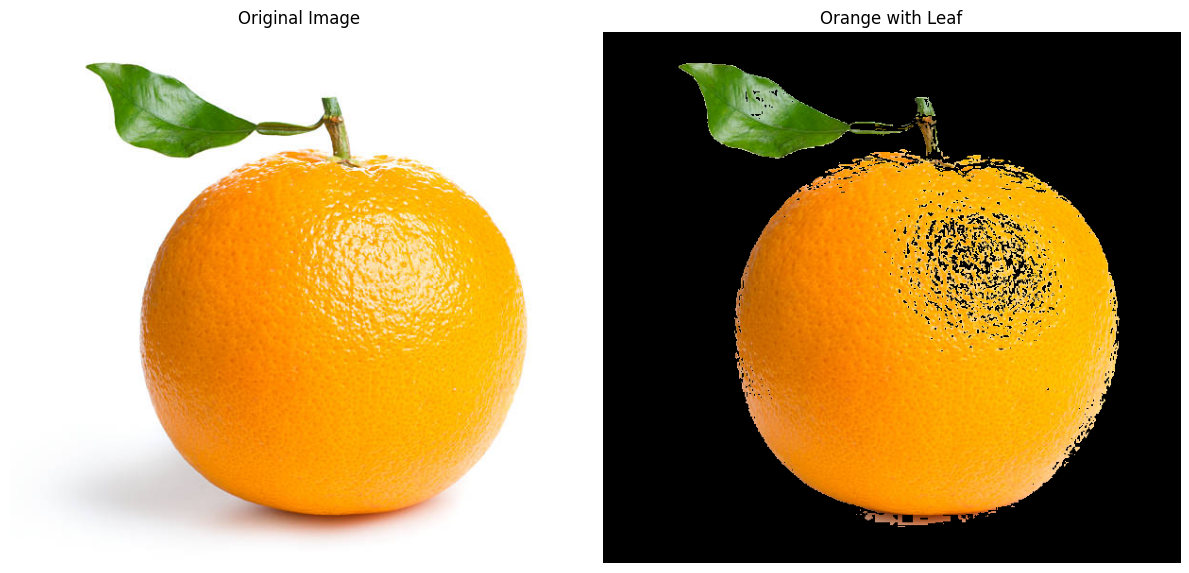

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('orange-1.jpg')

# Convert BGR to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color range for orange and leaf 
orange_lower = np.array([10, 100, 100])  # Lower bound for orange
orange_upper = np.array([25, 255, 255])  # Upper bound for orange

leaf_lower = np.array([35, 40, 40])      # Lower bound for leaf
leaf_upper = np.array([85, 255, 255])    # Upper bound for leaf

# Create masks for both the orange and leaf
mask_orange = cv2.inRange(hsv, orange_lower, orange_upper)
mask_leaf = cv2.inRange(hsv, leaf_lower, leaf_upper)

# Combine the masks (OR operation)
comb_mask = cv2.bitwise_or(mask_orange, mask_leaf)

# Mask the original image to extract the object
result = cv2.bitwise_and(image, image, mask=comb_mask)

# Convert images to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title('Orange with Leaf')
plt.axis('off')

plt.tight_layout()
plt.show()

# Bonus-2: build mask and apply on the image (use thresholding)

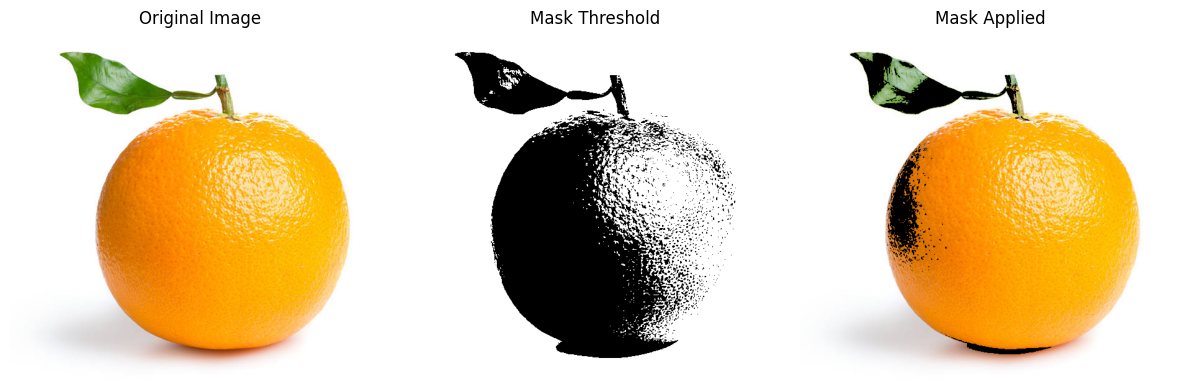

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
input_image_path = 'orange-1.jpg'  
image = cv2.imread(input_image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding 
ret, th = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)

# mask create for yellokw
mask_rgb = cv2.merge([mask, mask, mask])

# Apply the mask to the original image using bitwise AND
result = cv2.bitwise_and(image, mask_rgb)

# Convert the original image and result from BGR to RGB format 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(th, cmap='gray')
plt.title('Mask Threshold')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_rgb)
plt.title('Mask Applied')
plt.axis('off')

plt.tight_layout()
plt.show()

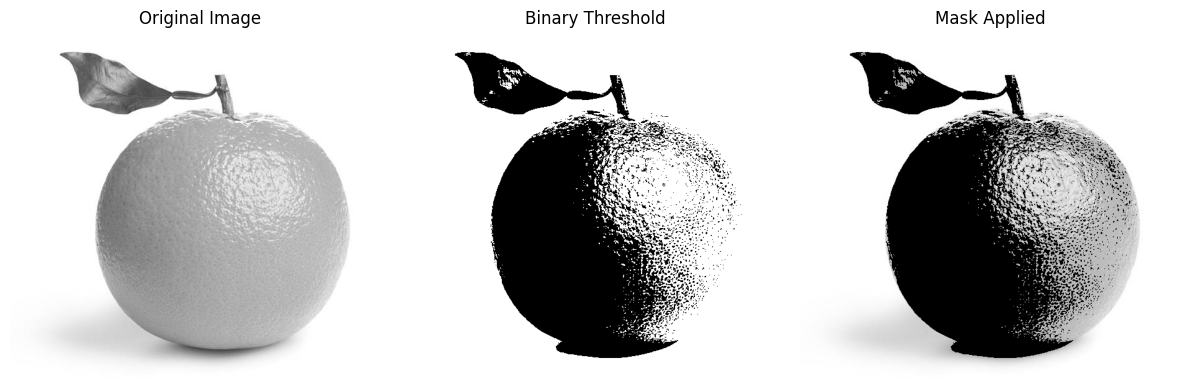

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = ('orange-1.jpg', cv2.IMREAD_GRAYSCALE)


# Apply Binary thresholding
ret, th1 = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)

# Convert the thresholded mask 
mask_rgb = cv2.merge([th1, th1, th1])


# Apply the mask to the original image using bitwise AND
result = cv2.bitwise_and(image_rgb, mask_rgb)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(th1, cmap='gray')
plt.title('Binary Threshold')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result)
plt.title('Mask Applied')
plt.axis('off')

plt.tight_layout()
plt.show()